<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/GPAW_Transp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GPAW Transport
https://wiki.fysik.dtu.dk/gpaw/tutorialsexercises/electronic/transport/transport.html


Run GPAW on Google-colab and calculate interface energy with jarvis-tools

In [1]:
!apt install python3-mpi4py cython3 libxc-dev gpaw-data
!pip -q install gpaw jarvis-tools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libxc9
Suggested packages:
  cython-doc python3-numpy
The following NEW packages will be installed:
  cython3 gpaw-data libxc-dev libxc9 python3-mpi4py
0 upgraded, 5 newly installed, 0 to remove and 18 not upgraded.
Need to get 66.5 MB of archives.
After this operation, 102 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 cython3 amd64 0.29.28-1ubuntu3 [1,336 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 gpaw-data all 0.9.20000-2 [52.7 MB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libxc9 amd64 5.1.7-1ubuntu1 [3,900 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libxc-dev amd64 5.1.7-1ubuntu1 [8,038 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 python3-mpi4py amd64 3.1.3-1build2 [465 kB]
Fetched 66.5 MB in 2s (37.1 

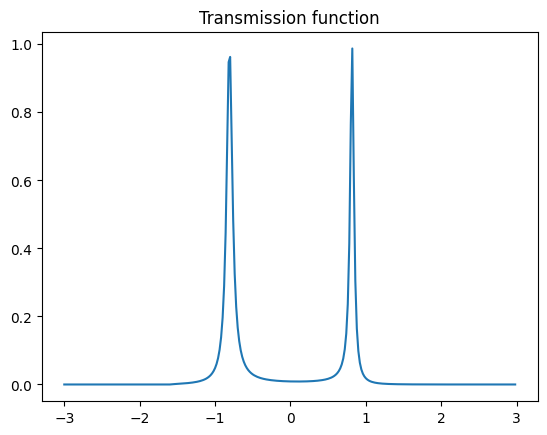

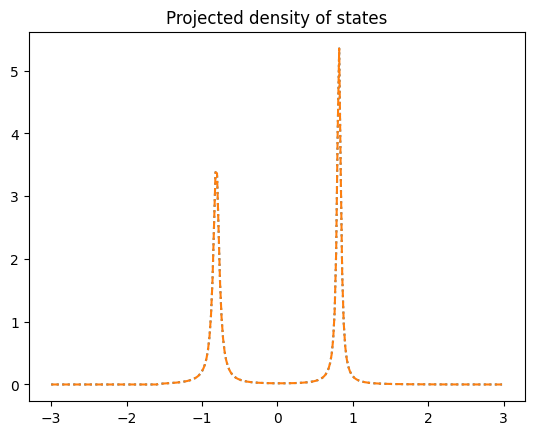

eigenvalue, eigenvector: -0.8000000000000003 , [0.70710678+0.j 0.70710678+0.j]
eigenvalue, eigenvector: 0.7999999999999999 , [ 0.70710678+0.j -0.70710678+0.j]


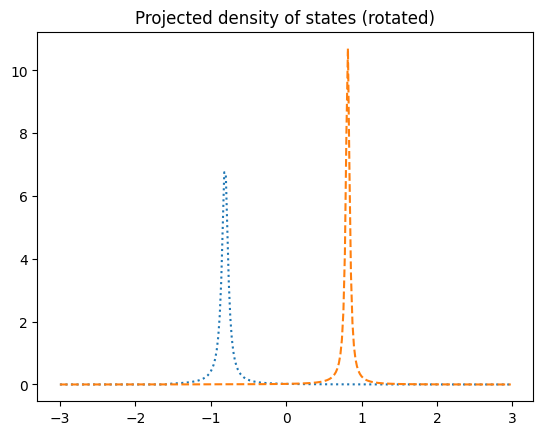

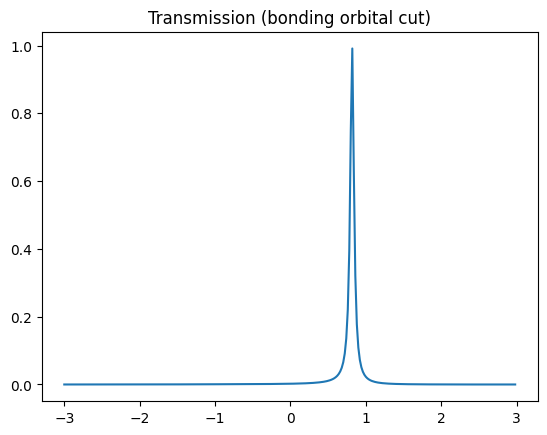

In [2]:
import numpy as np
from ase.transport.calculators import TransportCalculator
import pylab

# onsite energies 0.0, nearest neighbor hopping -1.0, and
# second nearest neighbor hopping 0.2
H_lead = np.array([[0., -1., 0.2, 0.],
                   [-1., 0., -1., 0.2],
                   [0.2, -1., 0., -1.],
                   [0., 0.2, -1., 0.]])

H_scat = np.zeros((6, 6))

# Principal layers on either side of S
H_scat[:2, :2] = H_scat[-2:, -2:] = H_lead[:2, :2]

# Scattering region (hydrogen molecule) - onsite 0.0 and hopping -0.8
H_scat[2:4, 2:4] = [[0.0, -0.8], [-0.8, 0.0]]

# coupling to the leads - nearest neighbor only
H_scat[1, 2] = H_scat[2, 1] = H_scat[3, 4] = H_scat[4, 3] = 0.2

tcalc = TransportCalculator(h=H_scat,  # Scattering Hamiltonian
                            h1=H_lead,  # Lead 1 (left)
                            h2=H_lead,  # Lead 2  (right)
                            energies=np.arange(-3, 3, 0.02))

T_e = tcalc.get_transmission()
pylab.plot(tcalc.energies, T_e)
pylab.title('Transmission function')
pylab.show()

tcalc.set(pdos=[2, 3])
pdos_ne = tcalc.get_pdos()
pylab.plot(tcalc.energies, pdos_ne[0], ':')
pylab.plot(tcalc.energies, pdos_ne[1], '--')
pylab.title('Projected density of states')
pylab.show()

h_rot, s_rot, eps_n, vec_nn = tcalc.subdiagonalize_bfs([2, 3])
tcalc.set(h=h_rot, s=s_rot)  # Set the rotated matrices
for n in range(2):
    print("eigenvalue, eigenvector:", eps_n[n], ',', vec_nn[:, n])

pdos_rot_ne = tcalc.get_pdos()
pylab.plot(tcalc.energies, pdos_rot_ne[0], ':')
pylab.plot(tcalc.energies, pdos_rot_ne[1], '--')
pylab.title('Projected density of states (rotated)')
pylab.show()

h_cut, s_cut = tcalc.cutcoupling_bfs([2])
tcalc.set(h=h_cut, s=s_cut)
T_cut_bonding_e = tcalc.get_transmission()
pylab.plot(tcalc.energies, T_cut_bonding_e)
pylab.title('Transmission (bonding orbital cut)')
pylab.show()


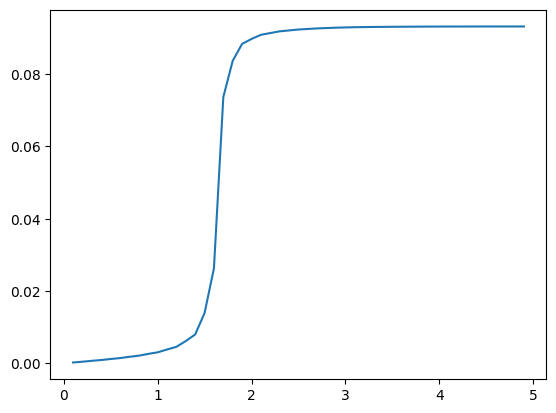

In [6]:
import numpy as np
x=np.arange(0.1,5,.1)
y=[]
for i in x:
    c = tcalc.get_current(bias=i)
    y.append(c)
import matplotlib.pyplot as plt
plt.plot(x,y)